In [2]:
simulations_folder = '/home/jeyseb/MP/CooperativeGPT/logs/0_commons_harvest_simulations'

# map of the files
simulations_kind_A = { 'Without Biografy':'sim_0___no_bio',
                      'All Agents Cooperative': 'sim_1___all_coop',
                      'All Coop With\n Cooperative Definition': 'sim_8_v2___all_coop___with_def',
                      'All Agents Selfish': 'sim_2___all_selfish',
                      #'All Coop with\n Free Bots': 'sim_4___all_coop_bots_sc0',
                      #'All Coop with\n Pacific Bots': 'sim_5___all_coop_bots_sc1',
                    }

simulations_kind_B = { 'Two Coop vs One Selfish':'sim_3___2_coop_1_selfish',
                        'Two Coop vs One Selfish With Definition':'sim_6___2_coop_1_selfish_with_definition',
                        'Two Coop vs One Self With Def and Temperature 0':'sim_7____2c_1s_with_def_and_temp_0', 
                        'Two Coop vs One Self With Def and GPT-4':'gp4_4___sim_0____2c_1s___with_def',             
                      }
simulations_kind_B = { 'Base Biografy\n No Coop Definition':'sim_3___2_coop_1_selfish',
                        'Cooperative Definition':'sim_6___2_coop_1_selfish_with_definition',
                        'Cooperative Definition\n & Temperature 0':'sim_7____2c_1s_with_def_and_temp_0', 
                        'GPT-4: Cooperative Definition \n Only one simulation':'gp4_4___sim_0____2c_1s___with_def',             
                      }


simulations_kind_C = { 
                      'All Coop with\n Pacific Bots': 'sim_5___all_coop_bots_sc1',
                      'All Coop with\n Free Bots': 'sim_4___all_coop_bots_sc0',
                      'All Selfish with\n Free Bots': 'sim_9___all_selfish_bots_sc0',
                    }

In [3]:
import os
import pandas as pd


def extract_dataframe_from_simulations(simulations_folder, simulations_kind, csv_file_name):
    # extract the dataframes from the simulations
    simulations = {}
    for simulation_name, simulation_folder in simulations_kind.items():
        print('Loading simulation: ', simulation_name)
        simulation_path = os.path.join(simulations_folder, simulation_folder)
        dataframe = pd.read_csv(os.path.join(simulation_path, csv_file_name))
        simulations[simulation_name] = dataframe
    return simulations


In [4]:
# Load avg_rewards_plot.csv
avg_rewards_plot_simulations_A = extract_dataframe_from_simulations(simulations_folder, simulations_kind_A, 'avg_rewards_plot.csv')

Loading simulation:  Without Biografy
Loading simulation:  All Agents Cooperative
Loading simulation:  All Coop With
 Cooperative Definition
Loading simulation:  All Agents Selfish


In [5]:
avg_rewards_plot_simulations_A['Without Biografy'].tail()

,round,Per capita reward,Individual 1,Individual 2,Individual 3
95,95,104.20,103.4,106.6,102.6
96,96,105.60,104.4,108.2,104.2
97,97,106.60,105.0,109.0,105.8
98,98,107.40,105.8,109.8,106.6
99,99,108.47,106.8,111.0,107.6


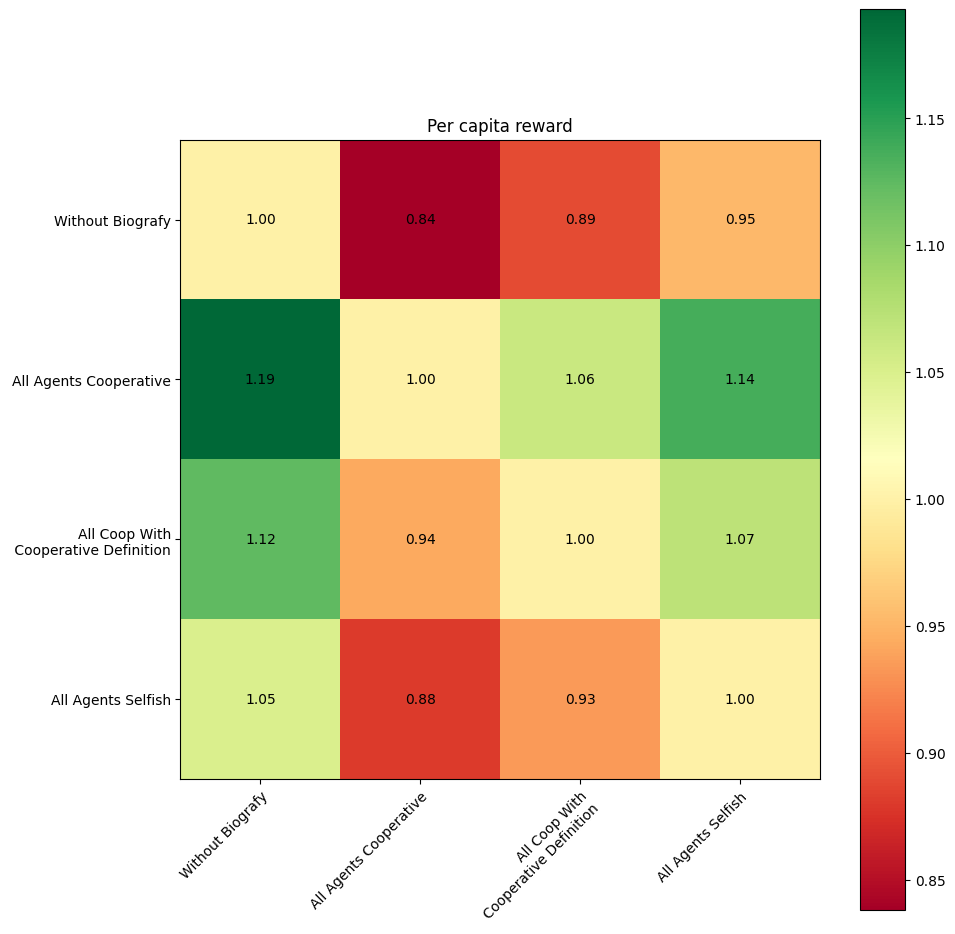

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def make_heatmap_from_simulations(simulations, title, save_path):
    # Creamos la matriz comparando cada simulación con las demás
    matrix = np.zeros((len(simulations), len(simulations)))
    for i, simulation_name in enumerate(simulations):
        simulation = simulations[simulation_name]
        last_row = simulation.iloc[-1]
        per_capita_reward = last_row['Per capita reward']
        for j, simulation_name_2 in enumerate(simulations):
            if i != j:
                simulation_2 = simulations[simulation_name_2]
                last_row_2 = simulation_2.iloc[-1]
                per_capita_reward_2 = last_row_2['Per capita reward']
                # Calculamos la proporción
                matrix[i, j] = per_capita_reward / per_capita_reward_2
            else:
                matrix[i, j] = 1  # La diagonal principal se mantiene en 0

    # Graficamos la matriz
    fig, ax = plt.subplots(figsize=(10,10))
    # Usamos un mapa de calor con colores que varían de rojo a verde
    cmap = plt.get_cmap('RdYlGn')
    v_min = matrix.min()
    v_max = matrix.max()
    im = ax.imshow(matrix, cmap=cmap, vmin=v_min, vmax=v_max)
    ax.set_xticks(np.arange(len(simulations)))
    ax.set_yticks(np.arange(len(simulations)))
    ax.set_xticklabels(simulations.keys())
    ax.set_yticklabels(simulations.keys())
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Añadimos los textos para cada celda
    for i in range(len(simulations)):
        for j in range(len(simulations)):
            color = "black" if abs(matrix[i, j]) > 0.5 else "black"
            text = ax.text(j, i, f"{matrix[i, j]:.2f}",
                           ha="center", va="center", color=color)

    ax.set_title(title)
    fig.colorbar(im, ax=ax)
    fig.tight_layout()
    plt.savefig(save_path)

# Ejemplo de uso
make_heatmap_from_simulations(avg_rewards_plot_simulations_A, 'Per capita reward', 'heatmap_per_capita_reward.png')

Loading simulation:  Base Biografy
 No Coop Definition
Loading simulation:  Cooperative Definition
Loading simulation:  Cooperative Definition
 & Temperature 0
Loading simulation:  GPT-4: Cooperative Definition 
 Only one simulation


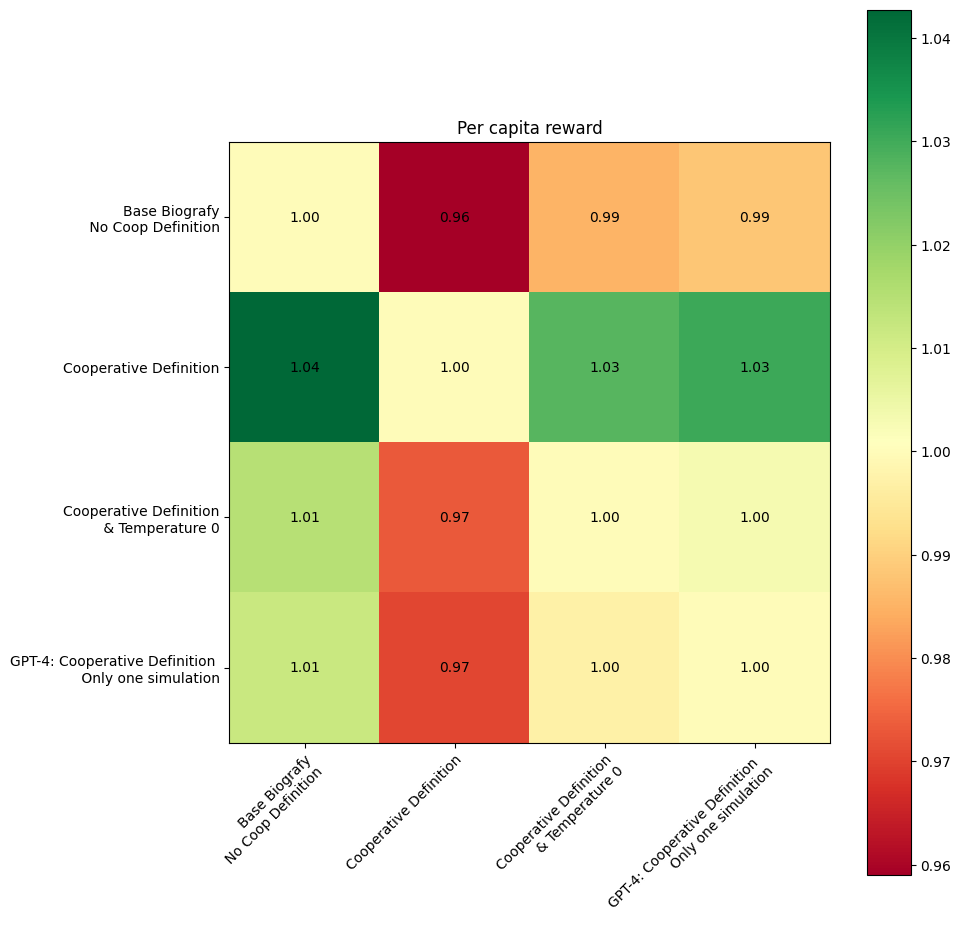

In [7]:
# Same plot for the other simulation folder B
avg_rewards_plot_simulations_B = extract_dataframe_from_simulations(simulations_folder, simulations_kind_B, 'avg_rewards_plot.csv')
make_heatmap_from_simulations(avg_rewards_plot_simulations_B, 'Per capita reward', 'heatmap_per_capita_reward_B.png')


Loading simulation:  All Coop with
 Pacific Bots
Loading simulation:  All Coop with
 Free Bots
Loading simulation:  All Selfish with
 Free Bots


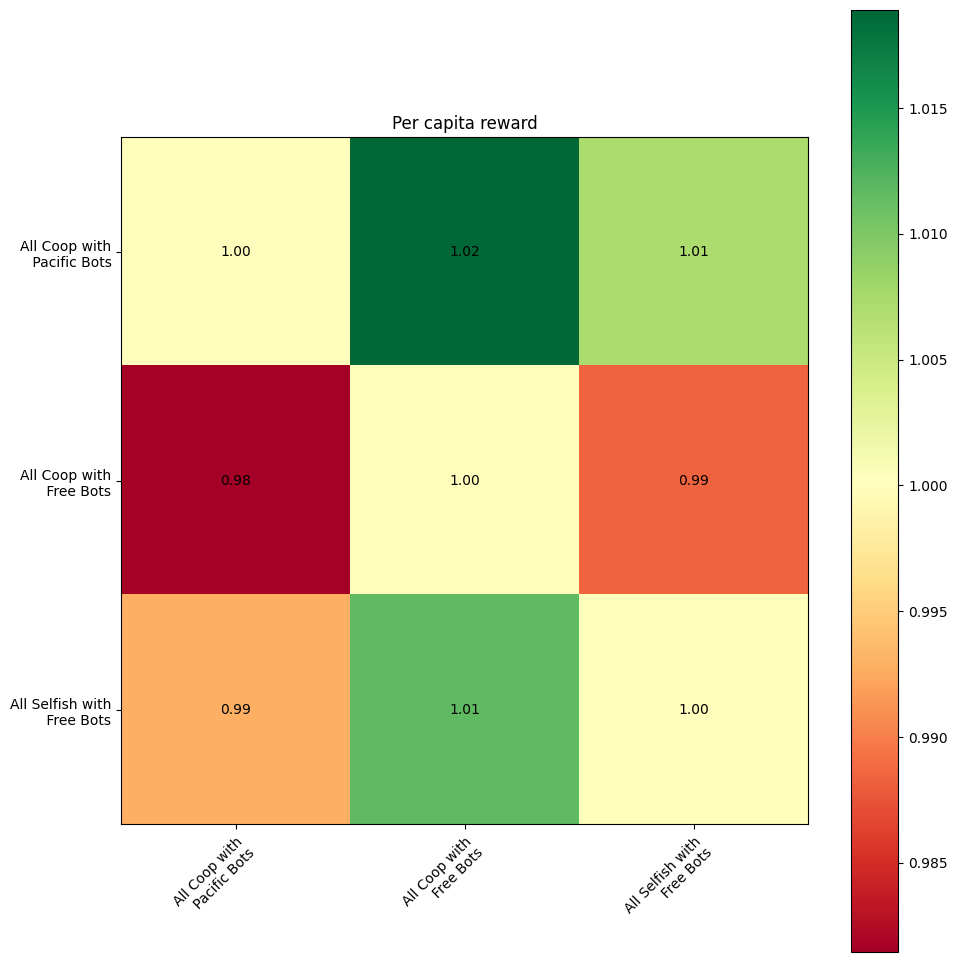

In [8]:
# Same plot for the other simulation folder C
avg_rewards_plot_simulations_C = extract_dataframe_from_simulations(simulations_folder, simulations_kind_C, 'avg_rewards_plot.csv')
make_heatmap_from_simulations(avg_rewards_plot_simulations_C, 'Per capita reward', 'heatmap_per_capita_reward_C.png')


## Cooperative indicators graphs

In [9]:
## Load attacks_data.csv
attacks_data_simulations_A = extract_dataframe_from_simulations(simulations_folder, simulations_kind_A, 'attacks_data.csv')


# For each simulation, we add a new row with the sum of the first 3 rows for each column
for simulation_name in attacks_data_simulations_A:
    simulation = attacks_data_simulations_A[simulation_name]
    simulation.loc['Sum'] = simulation.iloc[0:3].sum(axis=0)
    simulation.loc['Mean'] = simulation.iloc[0:3].mean(axis=0)
    

attacks_data_simulations_A['Without Biografy'].tail()

Loading simulation:  Without Biografy
Loading simulation:  All Agents Cooperative
Loading simulation:  All Coop With
 Cooperative Definition
Loading simulation:  All Agents Selfish


,Unnamed: 0,incapacitations_by_agent,attacks_by_agent,times_being_incapacitated,trees_deleted_by_agent,attacks_by_agent_std_dev,incapacitations_by_agent_std_dev,times_being_incapacitated_std_dev,trees_deleted_by_agent_std_dev
0,0.0,1.600000,5.600000,1.400000,1.000000,3.01,1.360000,1.02,0.630000
1,1.0,1.400000,4.200000,0.800000,1.000000,2.86,1.500000,0.75,0.890000
2,2.0,0.800000,5.600000,1.600000,1.400000,4.36,1.170000,1.62,0.800000
Sum,3.0,3.800000,15.400000,3.800000,3.400000,10.23,4.030000,3.39,2.320000
Mean,1.0,1.266667,5.133333,1.266667,1.133333,3.41,1.343333,1.13,0.773333


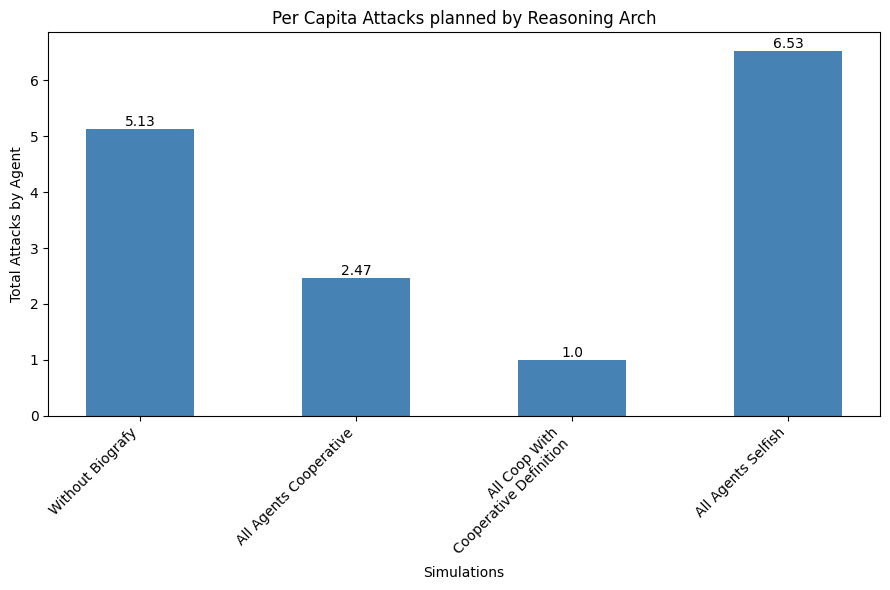

In [42]:
# Generate a beauty bar plot with the sum (last element of each dataframe) of the attacks_by_agent column for each simulation

def make_plot_attacks_by_agent(simulations, title, save_path):
    attacks_by_agent = [simulations[simulation_name].loc['Mean']['attacks_by_agent'] for simulation_name in simulations]

    fig, ax = plt.subplots(figsize=(9, 6))  # Tamaño ajustado para mejor visualización
    bars = ax.bar(simulations.keys(), attacks_by_agent, color='steelblue', width=0.5)  # Color uniforme para las barras

    # Añadir anotaciones en cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black')

    ax.set_xticks(np.arange(len(simulations)))
    ax.set_xticklabels(simulations.keys(), rotation=45, ha="right")  # Etiquetas claras y legibles

    ax.set_title(title)
    ax.set_xlabel('Simulations')  # Etiqueta descriptiva para el eje X
    ax.set_ylabel('Total Attacks by Agent')  # Etiqueta descriptiva para el eje Y

    plt.tight_layout()  # Ajuste automático del diseño
    plt.savefig(save_path)


make_plot_attacks_by_agent(attacks_data_simulations_A, 'Per Capita Attacks planned by Reasoning Arch', 'bar_attacks_by_agent.png')

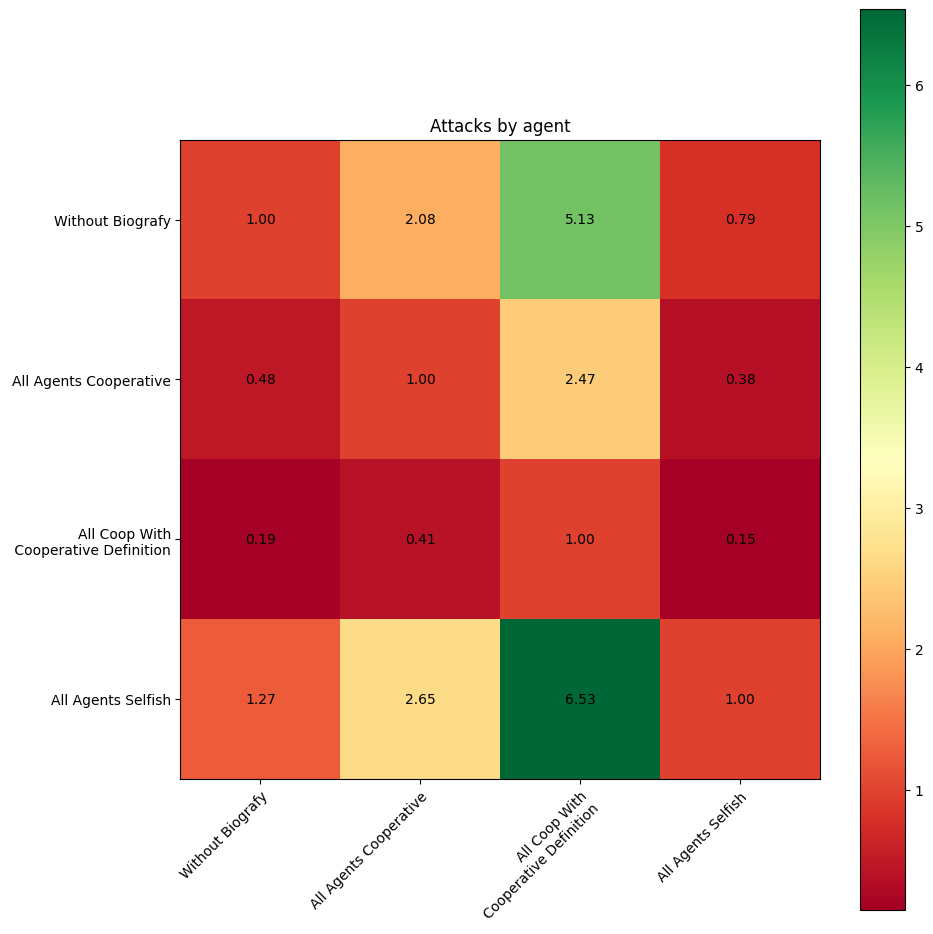

In [11]:
# Generate a matrix plot with the ratios for the sum (last element of each dataframe) of the attacks_by_agent column for each simulation
def make_plot_attacks_by_agent(simulations, title, save_path):
    
    # Creamos la matriz comparando cada simulación con las demás
    matrix = np.zeros((len(simulations), len(simulations)))
    for i, simulation_name in enumerate(simulations):
        simulation = simulations[simulation_name]
        last_row = simulation.iloc[-1]
        attacks_by_agent = last_row['attacks_by_agent']
        for j, simulation_name_2 in enumerate(simulations):
            if i != j:
                simulation_2 = simulations[simulation_name_2]
                last_row_2 = simulation_2.iloc[-1]
                attacks_by_agent_2 = last_row_2['attacks_by_agent']
                # Calculamos la proporción
                matrix[i, j] = attacks_by_agent / attacks_by_agent_2
            else:
                matrix[i, j] = 1  # La diagonal principal se mantiene en 0

    # Graficamos la matriz
    fig, ax = plt.subplots(figsize=(10,10))
    # Usamos un mapa de calor con colores que varían de rojo a verde
    cmap = plt.get_cmap('RdYlGn')
    v_min = matrix.min()
    v_max = matrix.max()
    im = ax.imshow(matrix, cmap=cmap, vmin=v_min, vmax=v_max)
    ax.set_xticks(np.arange(len(simulations)))
    ax.set_yticks(np.arange(len(simulations)))
    ax.set_xticklabels(simulations.keys())
    ax.set_yticklabels(simulations.keys())
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Añadimos los textos para cada celda
    for i in range(len(simulations)):
        for j in range(len(simulations)):
            color = "black" if abs(matrix[i, j]) > 0.5 else "black"
            text = ax.text(j, i, f"{matrix[i, j]:.2f}",
                           ha="center", va="center", color=color)

    ax.set_title(title)
    fig.colorbar(im, ax=ax)
    fig.tight_layout()
    plt.savefig(save_path)
    
make_plot_attacks_by_agent(attacks_data_simulations_A, 'Attacks by agent', 'heatmap_attacks_by_agent.png')

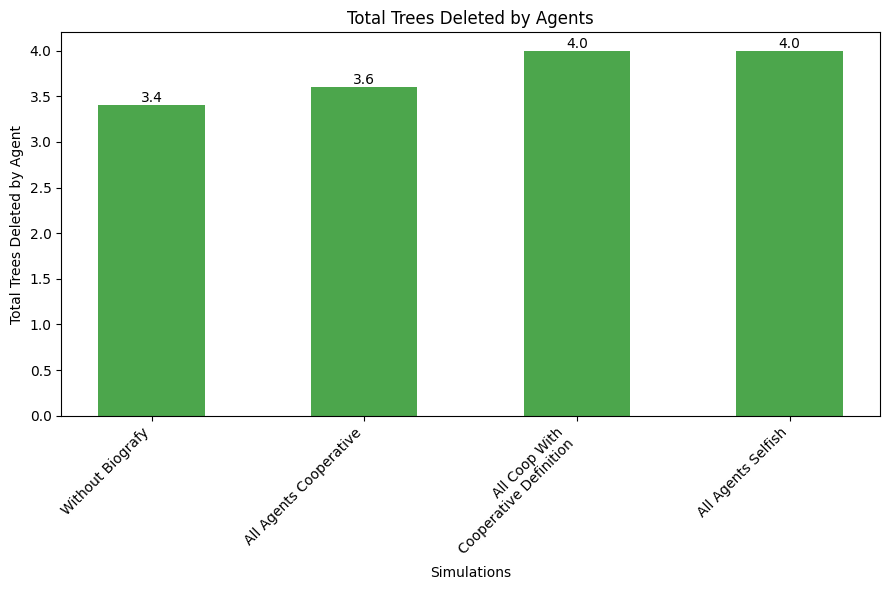

In [41]:
## Now we do the same for the column trees_deleted_by_agent which already have the per capita value on 
## the last row of each dataframe

# Generate a beauty bar plot with the sum (last element of each dataframe) of the trees_deleted_by_agent column for each simulation

def make_plot_trees_deleted_by_agent(simulations, title, save_path):
    trees_deleted_by_agent = [simulations[simulation_name].loc['Sum']['trees_deleted_by_agent'] for simulation_name in simulations]

    fig, ax = plt.subplots(figsize=(9, 6))  # Tamaño ajustado para mejor visualización
    bars = ax.bar(simulations.keys(), trees_deleted_by_agent, color='green', alpha=0.7, width=0.5)  # Color uniforme para las barras

    # Añadir anotaciones en cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black')

    ax.set_xticks(np.arange(len(simulations)))
    ax.set_xticklabels(simulations.keys(), rotation=45, ha="right")  # Etiquetas claras y legibles

    ax.set_title(title)
    ax.set_xlabel('Simulations')  # Etiqueta descriptiva para el eje X
    ax.set_ylabel('Total Trees Deleted by Agent')  # Etiqueta descriptiva para el eje Y

    plt.tight_layout()  # Ajuste automático del diseño
    plt.savefig(save_path)
    
make_plot_trees_deleted_by_agent(attacks_data_simulations_A, 'Total Trees Deleted by Agents', 'heatmap_trees_deleted_by_agent.png')


In [13]:
# Now for the simulation B 
attacks_data_simulations_B = extract_dataframe_from_simulations(simulations_folder, simulations_kind_B, 'attacks_data.csv')

# For each simulation, we add a new row with the sum of the first 3 rows for each column and a row for mean
for simulation_name in attacks_data_simulations_B:
    simulation = attacks_data_simulations_B[simulation_name]
    simulation.loc['Sum'] = simulation.iloc[0:2].sum(axis=0)
    simulation.loc['Mean'] = simulation.iloc[0:2].mean(axis=0)
    

attacks_data_simulations_B['Base Biografy\n No Coop Definition'].tail()

Loading simulation:  Base Biografy
 No Coop Definition
Loading simulation:  Cooperative Definition
Loading simulation:  Cooperative Definition
 & Temperature 0
Loading simulation:  GPT-4: Cooperative Definition 
 Only one simulation


,Unnamed: 0,incapacitations_by_agent,attacks_by_agent,times_being_incapacitated,trees_deleted_by_agent,attacks_by_agent_std_dev,incapacitations_by_agent_std_dev,times_being_incapacitated_std_dev,trees_deleted_by_agent_std_dev
0,0.0,1.0,3.6,0.8,2.0,1.850,0.89,1.17,1.790
1,1.0,0.4,4.0,1.0,1.4,1.900,0.49,0.89,1.020
2,2.0,1.0,6.8,0.6,1.8,6.680,1.26,0.80,0.980
Sum,1.0,1.4,7.6,1.8,3.4,3.750,1.38,2.06,2.810
Mean,0.5,0.7,3.8,0.9,1.7,1.875,0.69,1.03,1.405


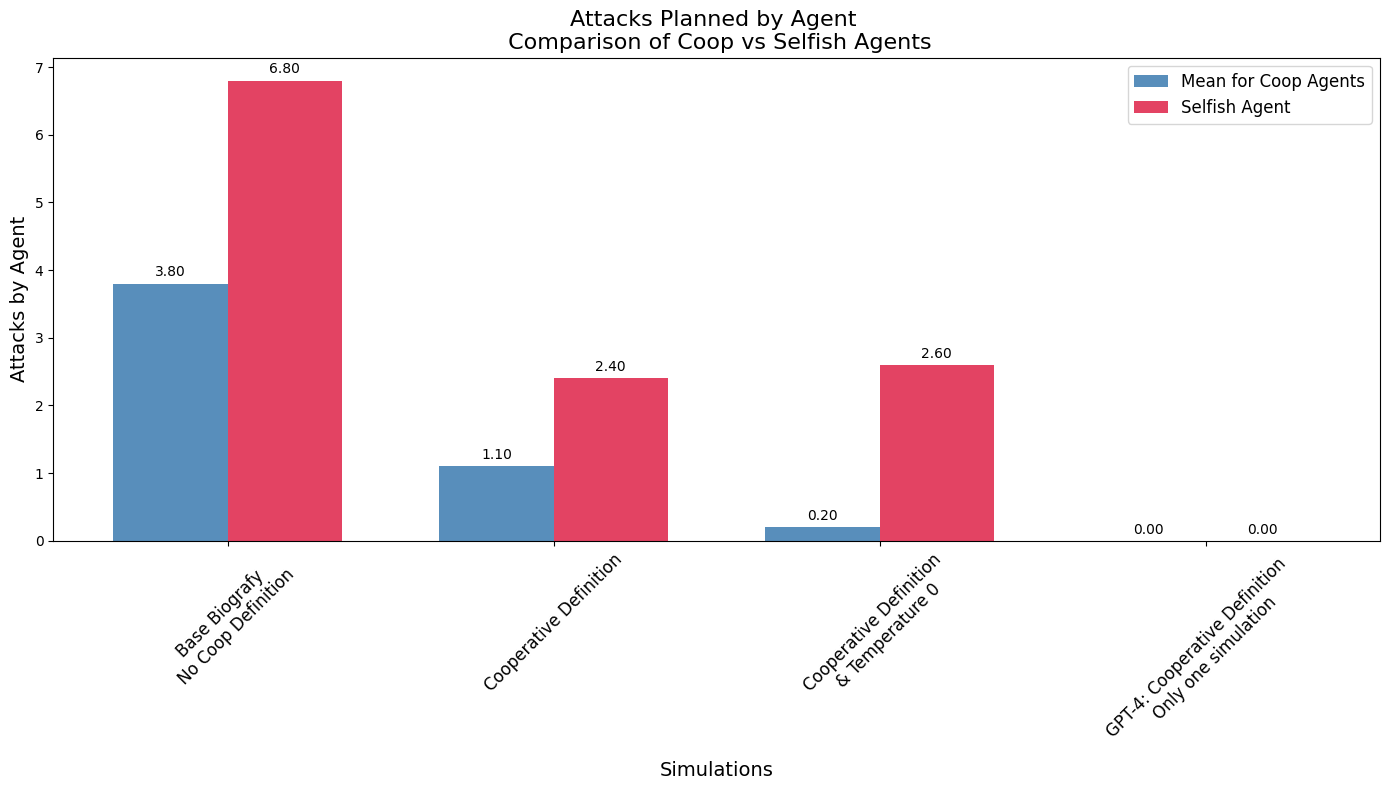

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def make_plot_attacks_by_agent(simulations, title, save_path):
    mean_values = [simulations[simulation_name].loc['Mean']['attacks_by_agent'] for simulation_name in simulations]
    selfish_values = [simulations[simulation_name].loc[2]['attacks_by_agent'] for simulation_name in simulations]

    fig, ax = plt.subplots(figsize=(14, 8))  # Tamaño ajustado para mejor visualización
    bar_width = 0.35
    index = np.arange(len(simulations))

    bars_mean = ax.bar(index, mean_values, bar_width, label='Mean for Coop Agents', color= 'steelblue', alpha=0.9)  # Color azul
    bars_selfish = ax.bar(index + bar_width, selfish_values, bar_width, label='Selfish Agent', color='crimson', alpha=0.8)  # Color carmesí

    ax.set_xlabel('Simulations', fontsize=14)
    ax.set_ylabel('Attacks by Agent', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(simulations.keys(), rotation=45, fontsize=12)
    ax.legend(fontsize=12)

    # Añadir valores encima de las barras
    for bar in bars_mean + bars_selfish:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()  # Ajuste automático del diseño
    plt.savefig(save_path)

# Ejemplo de uso
make_plot_attacks_by_agent(attacks_data_simulations_B, 'Attacks Planned by Agent \n Comparison of Coop vs Selfish Agents', 'attacks_by_agent_comparison_B.png')

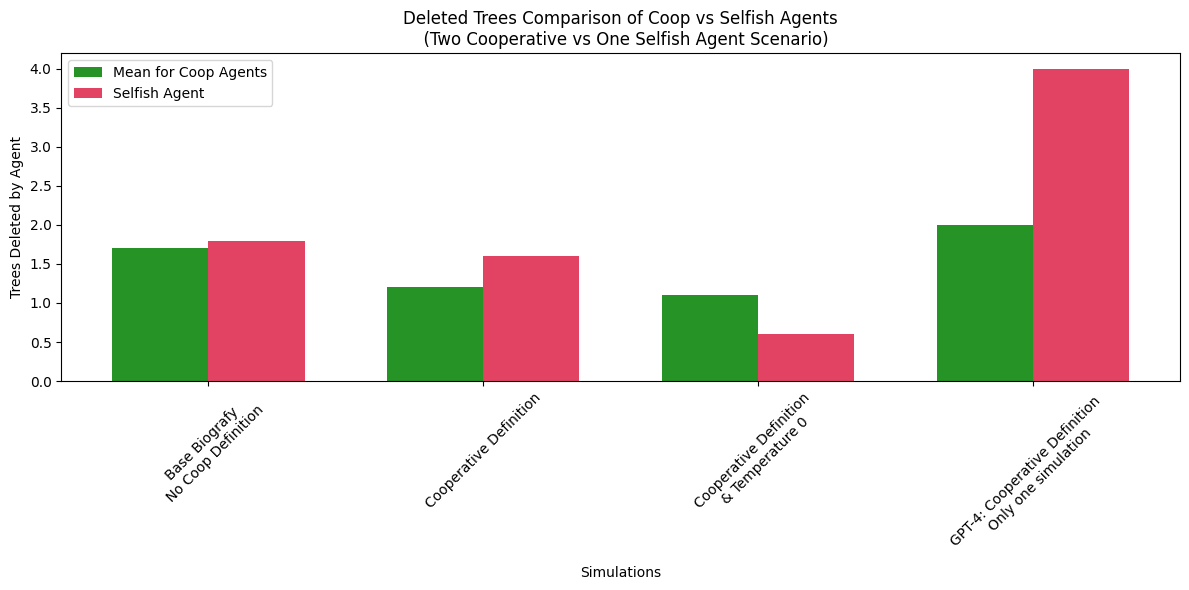

In [30]:
## The same for the trees_deleted_by_agent column
import numpy as np
import matplotlib.pyplot as plt

def make_plot_trees_deleted_by_agent(simulations, title, save_path):
    mean_values = [simulations[simulation_name].loc['Mean']['trees_deleted_by_agent'] for simulation_name in simulations]
    selfish_values = [simulations[simulation_name].loc[2]['trees_deleted_by_agent'] for simulation_name in simulations]

    fig, ax = plt.subplots(figsize=(12, 6))
    # Ajustar la posición de las barras
    bar_width = 0.35
    index = np.arange(len(simulations))

    bars_mean = ax.bar(index, mean_values, bar_width, label='Mean for Coop Agents', color='green', alpha=0.85)  # Color uniforme para las barras
    bars_selfish = ax.bar(index + bar_width, selfish_values, bar_width, label='Selfish Agent', color='crimson', alpha=0.8)

    ax.set_xlabel('Simulations')
    ax.set_ylabel('Trees Deleted by Agent')
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(simulations.keys(), rotation=45)
    ax.legend()

    plt.tight_layout()
    plt.savefig(save_path)
    
make_plot_trees_deleted_by_agent(attacks_data_simulations_B, 'Deleted Trees Comparison of Coop vs Selfish Agents\n  (Two Cooperative vs One Selfish Agent Scenario)', 'trees_deleted_by_agent_comparison_B.png')

Loading simulation:  All Coop with
 Pacific Bots
Loading simulation:  All Coop with
 Free Bots
Loading simulation:  All Selfish with
 Free Bots


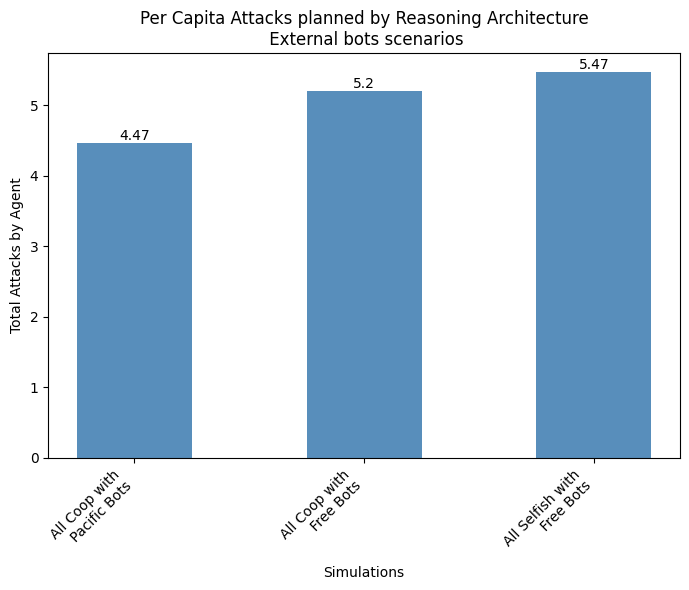

In [44]:
# Generate all the plots for the simulation C

attacks_data_simulations_C = extract_dataframe_from_simulations(simulations_folder, simulations_kind_C, 'attacks_data.csv')

# For each simulation, we add a new row with the sum of the first 3 rows for each column and a row for mean

for simulation_name in attacks_data_simulations_C:
    simulation = attacks_data_simulations_C[simulation_name]
    simulation.loc['Sum'] = simulation.iloc[0:3].sum(axis=0)
    simulation.loc['Mean'] = simulation.iloc[0:3].mean(axis=0)
    

attacks_data_simulations_C['All Coop with\n Pacific Bots'].tail()

# Generate a beauty bar plot with the sum (last element of each dataframe) of the attacks_by_agent column for each simulation

def make_plot_attacks_by_agent(simulations, title, save_path):
    attacks_by_agent = [simulations[simulation_name].loc['Mean']['attacks_by_agent'] for simulation_name in simulations]
    bar_width = 0.5
    fig, ax = plt.subplots(figsize=(7, 6))  # Tamaño ajustado para mejor visualización
    bars = ax.bar(simulations.keys(), attacks_by_agent, color='steelblue', alpha=0.9, width=bar_width)  # Color uniforme para las barras

    # Añadir anotaciones en cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black')

    ax.set_xticks(np.arange(len(simulations)))
    ax.set_xticklabels(simulations.keys(), rotation=45, ha="right")  # Etiquetas claras y legibles

    ax.set_title(title)
    ax.set_xlabel('Simulations')  # Etiqueta descriptiva para el eje X
    ax.set_ylabel('Total Attacks by Agent')  # Etiqueta descriptiva para el eje Y

    plt.tight_layout()  # Ajuste automático del diseño
    plt.savefig(save_path)
    
make_plot_attacks_by_agent(attacks_data_simulations_C, 'Per Capita Attacks planned by Reasoning Architecture\n External bots scenarios', 'bar_attacks_by_agent_C.png')


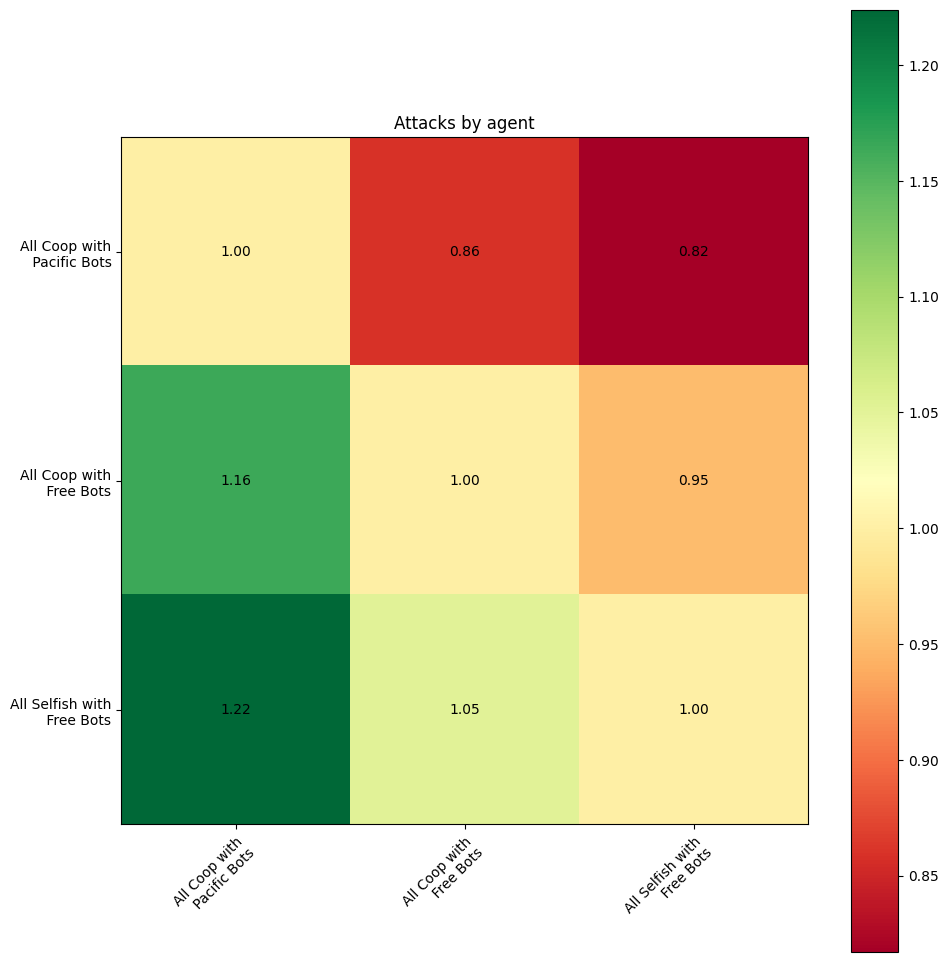

In [16]:

# Generate a matrix plot with the ratios for the sum (last element of each dataframe) of the attacks_by_agent column for each simulation

def make_plot_attacks_by_agent(simulations, title, save_path):
    
    # Creamos la matriz comparando cada simulación con las demás
    matrix = np.zeros((len(simulations), len(simulations)))
    for i, simulation_name in enumerate(simulations):
        simulation = simulations[simulation_name]
        last_row = simulation.iloc[-1]
        attacks_by_agent = last_row['attacks_by_agent']
        for j, simulation_name_2 in enumerate(simulations):
            if i != j:
                simulation_2 = simulations[simulation_name_2]
                last_row_2 = simulation_2.iloc[-1]
                attacks_by_agent_2 = last_row_2['attacks_by_agent']
                # Calculamos la proporción
                matrix[i, j] = attacks_by_agent / attacks_by_agent_2
            else:
                matrix[i, j] = 1  # La diagonal principal se mantiene en 0

    # Graficamos la matriz
    fig, ax = plt.subplots(figsize=(10,10))
    # Usamos un mapa de calor con colores que varían de rojo a verde
    cmap = plt.get_cmap('RdYlGn')
    v_min = matrix.min()
    v_max = matrix.max()
    im = ax.imshow(matrix, cmap=cmap, vmin=v_min, vmax=v_max)
    ax.set_xticks(np.arange(len(simulations)))
    ax.set_yticks(np.arange(len(simulations)))
    ax.set_xticklabels(simulations.keys())
    ax.set_yticklabels(simulations.keys())
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Añadimos los textos para cada celda
    for i in range(len(simulations)):
        for j in range(len(simulations)):
            color = "black" if abs(matrix[i, j]) > 0.5 else "black"
            text = ax.text(j, i, f"{matrix[i, j]:.2f}",
                           ha="center", va="center", color=color)

    ax.set_title(title)
    fig.colorbar(im, ax=ax)
    fig.tight_layout()
    plt.savefig(save_path)
    
make_plot_attacks_by_agent(attacks_data_simulations_C, 'Attacks by agent', 'heatmap_attacks_by_agent_C.png')


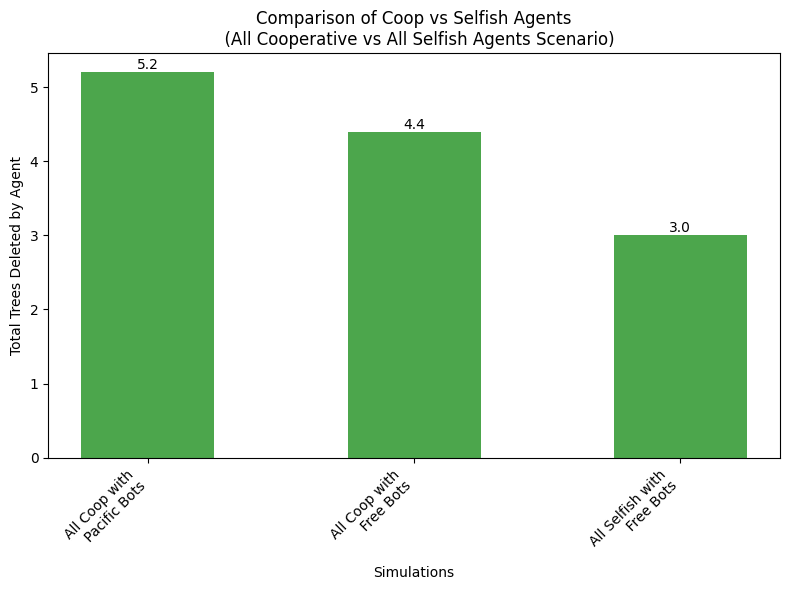

In [39]:
## Now we do the same for the column trees_deleted_by_agent which already have the per capita value on 
## the last row of each dataframe

# Generate a beauty bar plot with the sum (last element of each dataframe) of the trees_deleted_by_agent column for each simulation

def make_plot_trees_deleted_by_agent(simulations, title, save_path):
    trees_deleted_by_agent = [simulations[simulation_name].loc['Sum']['trees_deleted_by_agent'] for simulation_name in simulations]

    fig, ax = plt.subplots(figsize=(8, 6))  # Tamaño ajustado para mejor visualización
    bars = ax.bar(simulations.keys(), trees_deleted_by_agent, color='green', alpha=0.7, width=0.5)  # Color uniforme para las barras

    # Añadir anotaciones en cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', color='black')

    ax.set_xticks(np.arange(len(simulations)))
    ax.set_xticklabels(simulations.keys(), rotation=45, ha="right")  # Etiquetas claras y legibles

    ax.set_title(title)
    ax.set_xlabel('Simulations')  # Etiqueta descriptiva para el eje X
    ax.set_ylabel('Total Trees Deleted by Agent')  # Etiqueta descriptiva para el eje Y

    plt.tight_layout()  # Ajuste automático del diseño
    plt.savefig(save_path)
    


make_plot_trees_deleted_by_agent(attacks_data_simulations_C, 'Comparison of Coop vs Selfish Agents\n  (All Cooperative vs All Selfish Agents Scenario)', 'trees_deleted_by_agent_comparison_C.png')
